In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os
import re
import pickle as pk
from scipy.signal import hilbert
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.fft import fft
from scipy.optimize import curve_fit

In [39]:
path =  'd:/Git_Proyects/Tesis/Faiss_vect/'
citas = pk.load(open(path+'cita_media_cluster_august.pk', 'rb'))
labels = ['RT', 'Tw originales']

def funcion_exponencial(x, a, b, c):
    return a * np.exp(b * x) + c


In [32]:
def graficar_y_guardar(list_df, citas, index, df_clus_completo):
    plt.figure(figsize=(8,6))
    maximos = []
    colors1 = ['cornflowerblue', 'orange']
    colors2 = ['midnightblue', 'red']
    for i, df1 in enumerate(list_df):
        df = df1.copy()
        df_index = df.set_index('Fecha')
        df_count_hora = df_index.resample('1H').count()
        result = seasonal_decompose(df_count_hora['Tweets'], model='additive')
        trend = result.trend.fillna(0)
        res = result.resid.fillna(0)
        seasonal = result.seasonal.fillna(0)

        maximos.append(max(df_count_hora['Tweets']))
        #plt.plot(df_count_hora.index, df_count_hora['Tweets']/max(df_count_hora['Tweets']), label = 'crudo '+str(labels[i]), marker = '.', color = colors1[i]) #Test comparation
        plt.plot(trend/max(trend), label = 'tendencia ' + labels[i], color = colors2[i])
        plt.plot(res/max(res), label = 'res ' + labels[i], color = colors2[i], alpha = 0.6, linestyle = 'dashed')

        #df_suavizado = df_count_hora.rolling('1D', center = True).mean()
        #df_suavizado.index = pd.to_datetime(df_suavizado.index) - pd.Timedelta(hours=8)
        #plt.plot(df_suavizado.index, df_suavizado['Tweets']/max(df_suavizado['Tweets']), label = labels[i], marker = '.', linestyle = 'solid')
#        try:
 #           espectro = np.abs(fft(trend.values))
 #           plt.plot(espectro)
 #       except:
 #           print('no pude entrar')

        fecha_max_apariciones = trend.idxmax()
        fecha_inicio = fecha_max_apariciones - pd.Timedelta(hours=1)
        fecha_fin = fecha_max_apariciones + pd.Timedelta(days=5)
        res = result.resid.fillna(0)
        trednd_max = trend.loc[str(fecha_inicio):str(fecha_fin)]
        max_res  = max(res)
        res = res[res.index>fecha_inicio]
        res = res[res.index<fecha_fin]
        print('CRUDO', np.std(df_count_hora['Tweets']/max(df_count_hora['Tweets'])), 'RESIDUOS ', np.std(res/max_res), 'MEAN RES', np.mean(res/max_res))#, 'RESTA   ', np.std(df_count_hora['Tweets']/max(df_count_hora['Tweets']))-np.std(trend/max(trend)))

        #print(np.std(trednd_max/max(trednd_max)), '\n')
    ag_str = "2019-08-01 00:00:00"
    inicio_ag = pd.to_datetime(ag_str)

    horas_a_restar = (inicio_ag- fecha_max_apariciones).total_seconds()/3600
    firstpart, secondpart = citas[index][:len(citas[index])//2], citas[index][len(citas[index])//2:]


    plt.title('id: '+ str(index)+ f' -- Max Tw {maximos[1]} -- Max RT {maximos[0]}  \n'   '   ' + firstpart+'\n'+secondpart)
    plt.legend()
    plt.grid(0.7)
    plt.xticks(rotation=45)
    #fecha_inicio = pd.to_datetime('2019-08-12')
    #fecha_fin = pd.to_datetime('2019-08-16')
    #plt.xticks(pd.date_range(start=df_clus_completo['Fecha'].min(), end=df_clus_completo['Fecha'].max(), freq='12H')
     #      , labels= (np.arange(df_clus_completo['HorasDesdeInicio'].min(), df_clus_completo['HorasDesdeInicio'].max(), 12)-horas_a_restar))

    plt.xlim([fecha_inicio, fecha_fin])
    #plt.savefig(path+f'imagenes_october/serie_{index}.png')
    plt.show() #borrar
    #plt.close()
    return trend

CRUDO 0.04924577453885276 RESIDUOS  0.019692242068567394 MEAN RES -0.0018792948952344624
CRUDO 0.06645056163289494 RESIDUOS  0.10469382177331243 MEAN RES 0.0003203469732151468


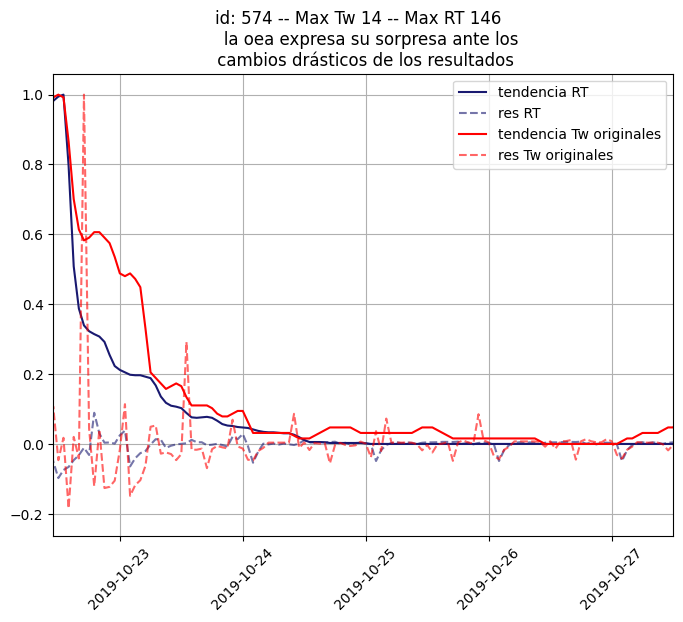

CRUDO 0.045027347539710556 RESIDUOS  0.011354892658847595 MEAN RES -0.0013839224209382715
CRUDO 0.10498880592196683 RESIDUOS  0.05520325801819449 MEAN RES -0.01038658157488523


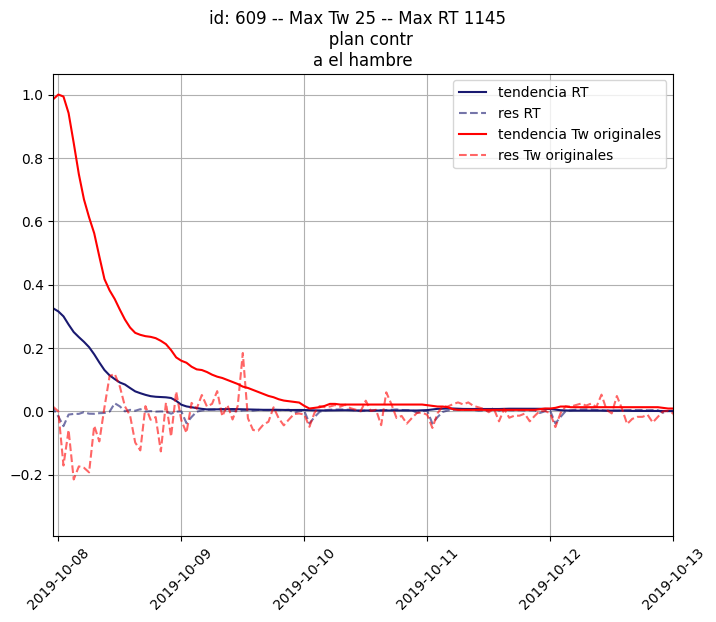

CRUDO 0.11566049091952356 RESIDUOS  0.19683936393387105 MEAN RES -0.0015087247701550666
CRUDO 0.07317077477200411 RESIDUOS  0.06242734414725454 MEAN RES -0.0038513312924925826


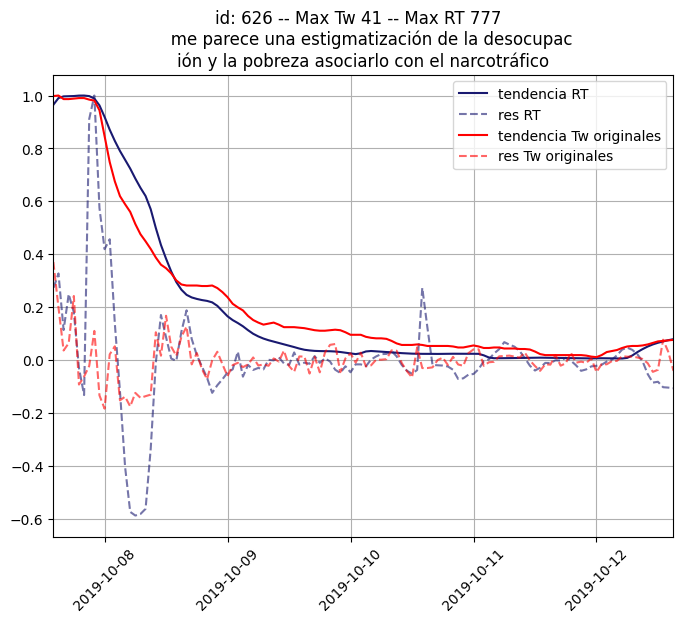

CRUDO 0.10506499133613766 RESIDUOS  0.10612839303078937 MEAN RES -0.023728439699262478
CRUDO 0.09756901453934547 RESIDUOS  0.0930462664364347 MEAN RES -0.020776416545434075


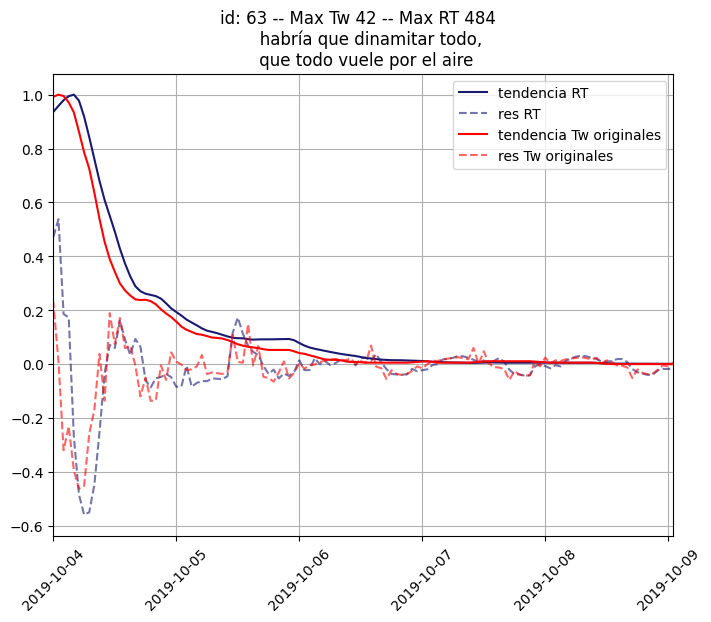

CRUDO 0.04792686695175132 RESIDUOS  0.01186450637308784 MEAN RES -0.0017204109327164957
CRUDO 0.04034839458075361 RESIDUOS  0.019693934468407313 MEAN RES -0.0009858462151579059


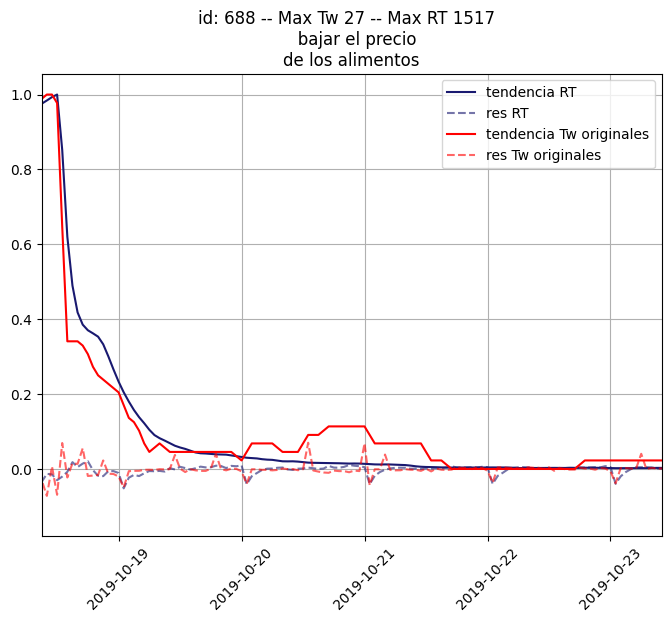

CRUDO 0.09943708071686101 RESIDUOS  0.7461292021600567 MEAN RES -0.21538894785867468
CRUDO 0.06545266726485356 RESIDUOS  0.22115394070191596 MEAN RES 0.019844535570549424


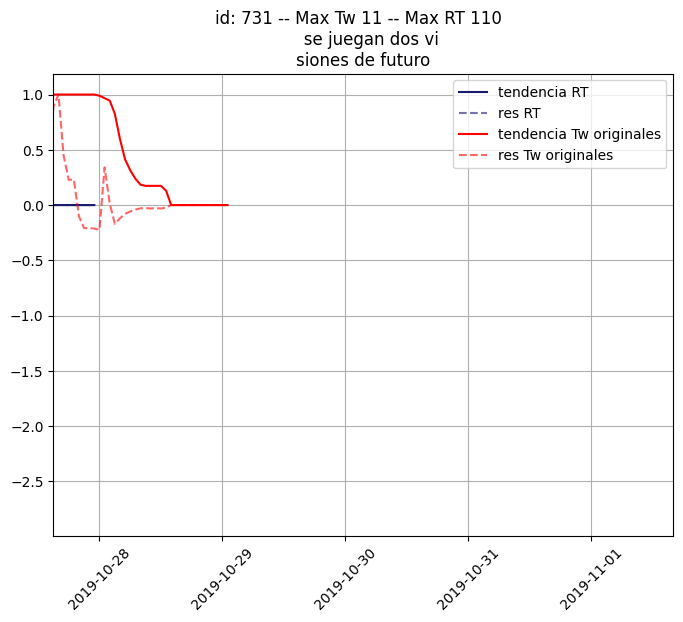

CRUDO 0.07364959904861987 RESIDUOS  0.07803854661929481 MEAN RES -0.0008685140610654021
CRUDO 0.04662482611491598 RESIDUOS  0.031618930501854055 MEAN RES -0.0008140806483176201


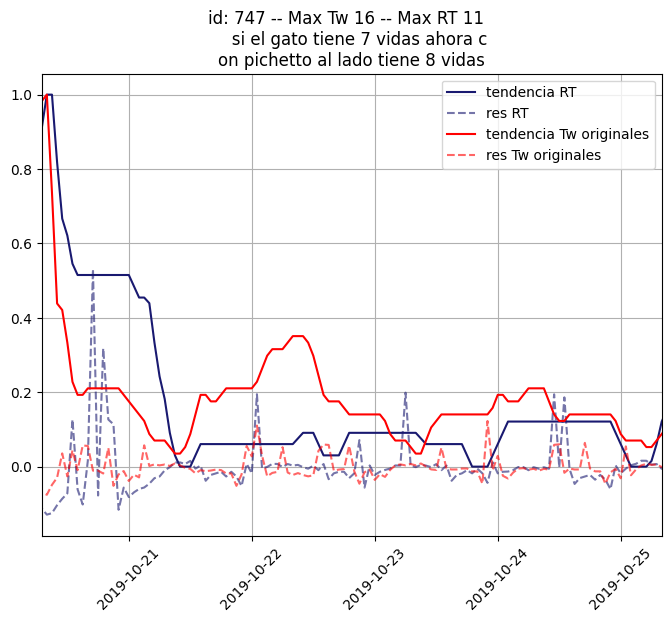

CRUDO 0.09389532101285782 RESIDUOS  0.06541206842104909 MEAN RES -0.016206712776663027
CRUDO 0.051409532681535225 RESIDUOS  0.06454847154813151 MEAN RES -0.009867763599342634


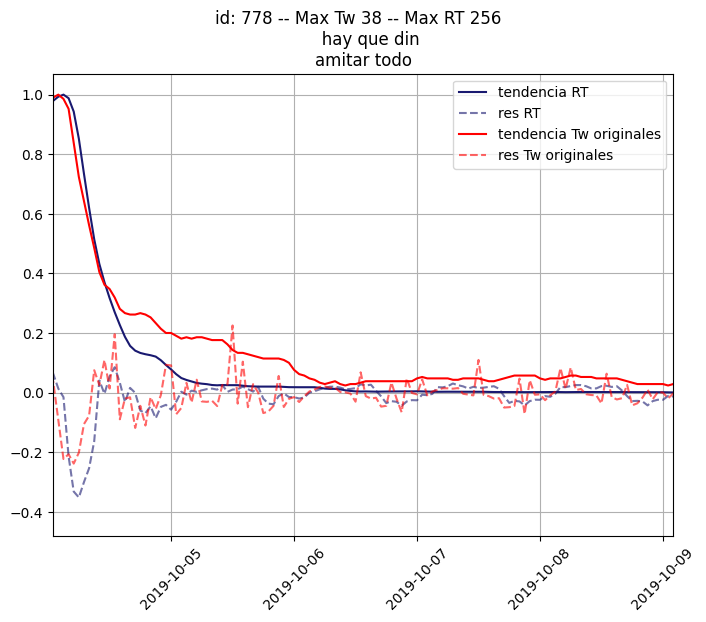

CRUDO 0.0906736318500203 RESIDUOS  0.03947498195816479 MEAN RES -0.00589113279370179
CRUDO 0.0701830342857957 RESIDUOS  0.15928100267345446 MEAN RES 0.001657377642286915


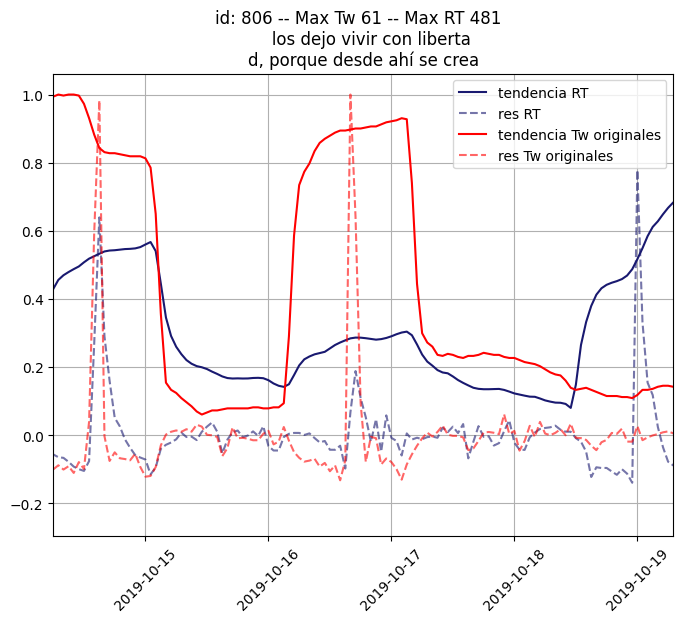

CRUDO 0.06259986523780257 RESIDUOS  0.0719169700321899 MEAN RES -0.004259241767962779
CRUDO 0.06811979163290743 RESIDUOS  0.02376960716427852 MEAN RES -0.002078615368574705


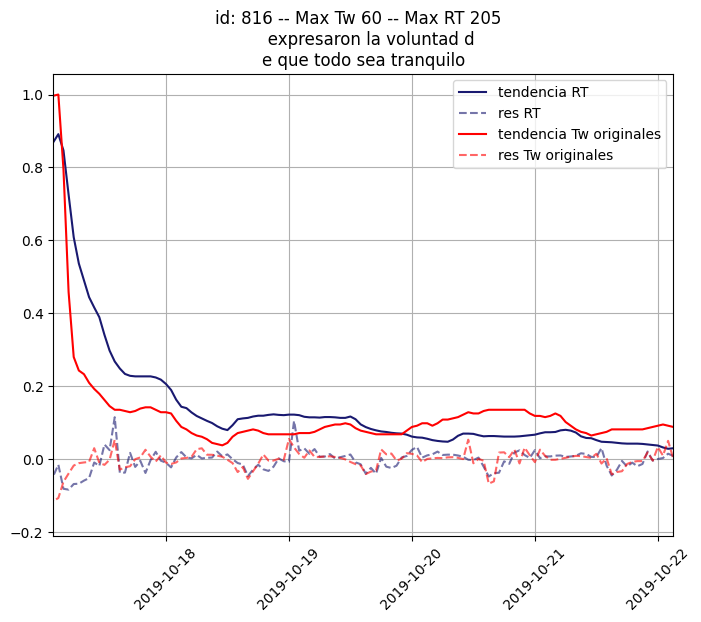

CRUDO 0.05954127847699505 RESIDUOS  0.06655190783190156 MEAN RES 0.00019315709353605188
CRUDO 0.07544670454931786 RESIDUOS  0.08142938061106604 MEAN RES 0.0036260222841057225


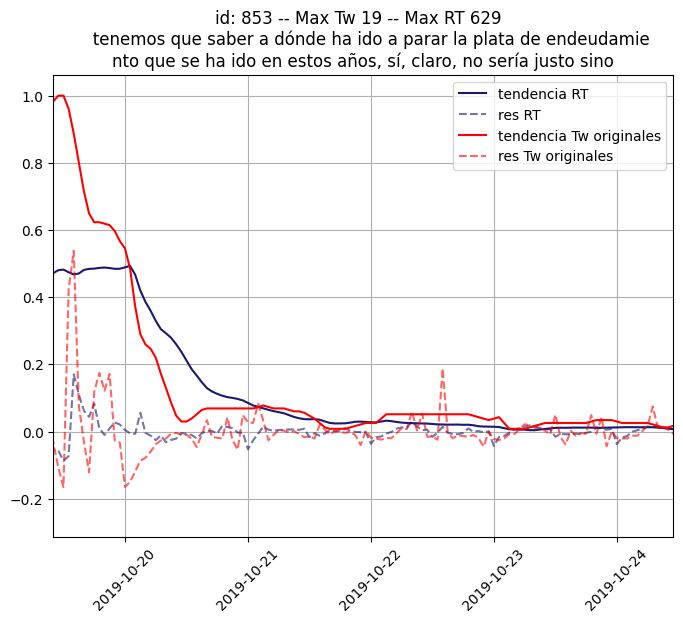

CRUDO 0.07566038740724604 RESIDUOS  0.041260788130759 MEAN RES 0.0026270536980419973
CRUDO 0.07170763371374367 RESIDUOS  0.07015586567458312 MEAN RES -0.0033372833499352313


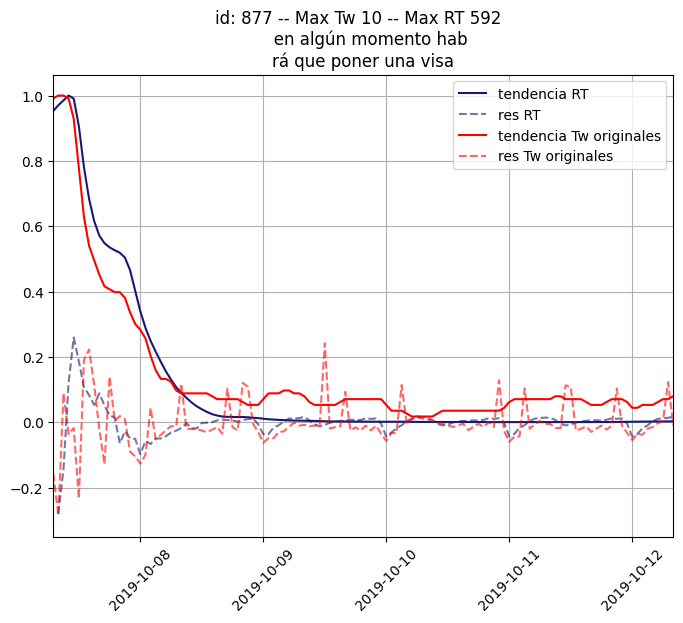

In [33]:
mes = 'october'
path =  'd:/Git_Proyects/Tesis/Faiss_vect/'
citas = pk.load(open(path+f'cita_media_cluster_{mes}.pk', 'rb'))
archivos = os.listdir(path+f'Tw_mas_RT_{mes}')
#archivos = os.listdir(path+f'Tw_mas_RT_all')


for archivo in archivos[-20:-8]:
    try:
        patron = re.compile(r'_(\d+).csv')
        coincidencia = patron.search(archivo)
        index = coincidencia.group(1)

        df_clus_completo = pd.read_csv(path+f'Tw_mas_RT_{mes}/'+archivo)
    #    df_clus_completo = pd.read_csv(path+f'Tw_mas_RT_all/'+archivo)
        df_clus_completo['Fecha'] = pd.to_datetime(df_clus_completo['Fecha'], format='%a %b %d %H:%M:%S +0000 %Y')  
        df_clus_completo['HorasDesdeInicio'] = (df_clus_completo['Fecha'] - df_clus_completo['Fecha'].min()).dt.total_seconds() / 3600
            
        categoria = 'RT'

        df_categoria_true = df_clus_completo[df_clus_completo[categoria] == True]
        df_categoria_false = df_clus_completo[df_clus_completo[categoria] == False]

        df_categoria = [df_categoria_true, df_categoria_false]
        labels = ['RT', 'Tw originales']
        t = graficar_y_guardar(df_categoria, citas, int(index), df_clus_completo)
    except:
        pass

In [18]:
t
x = np.arange(0, len(t.values), 1)
#popt, pcov = curve_fit(funcion_exponencial, x, np.array(t.values()), p0=[1,-1,1])
#print('AJUSTEEEEE', popt, '\n')
pd.to_numeric(t.index)
len(x), len(t.values)
fecha_max_apariciones = t.idxmax()
fecha_inicio = fecha_max_apariciones - pd.Timedelta(hours=1)
fecha_fin = fecha_max_apariciones + pd.Timedelta(days=5)
aaa = t[t.index>fecha_inicio]
aaa = aaa[aaa.index<fecha_fin]
aaa
#t.index>pd.to_datetime('2019-10-03 00:00:00')

Fecha
2019-10-07 08:00:00    2.354167
2019-10-07 09:00:00    2.354167
2019-10-07 10:00:00    2.333333
2019-10-07 11:00:00    2.187500
2019-10-07 12:00:00    1.833333
                         ...   
2019-10-12 03:00:00    0.125000
2019-10-12 04:00:00    0.125000
2019-10-12 05:00:00    0.145833
2019-10-12 06:00:00    0.166667
2019-10-12 07:00:00    0.166667
Freq: H, Name: trend, Length: 120, dtype: float64

In [40]:
largo_tot = 3000
largo_citas = np.zeros(len(citas[0:largo_tot]))
for i,cit in enumerate(citas[0:largo_tot]):
    largo_citas[i]  = len(cit.split(" "))

Text(0, 0.5, 'Densidad de apariciones')

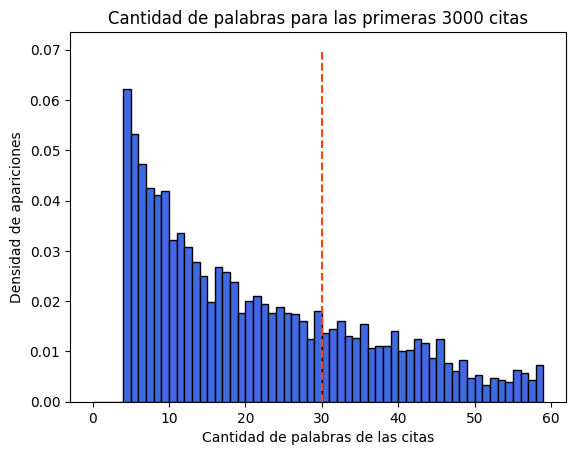

In [41]:
b = np.arange(0, max(largo_citas), 1)
plt.title('Cantidad de palabras para las primeras 3000 citas')
plt.hist(largo_citas, bins = b, edgecolor = 'k', density=True, color  = 'royalblue')
plt.vlines(x =  30, ymin=0, ymax = 0.07, linestyle = 'dashed',  color = 'orangered')
plt.xlabel('Cantidad de palabras de las citas')
plt.ylabel('Densidad de apariciones')

In [25]:
len(np.where(largo_citas>30)[0])

343

In [21]:
citas[1479]

"es un abuso de poder, la diputada no puede gritar 'soy diputada', el rol de diputada no le da la capacidad para intervenir en una situación policial, más aún cuando la persona que estaba siendo registrada era, además, alguien que tenía una buena cantidad de capturas y había cometido un delito en ese mismo momento"